### Import Libraries


In [76]:
import pandas as pd
import datetime
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

### Preprocessing & Descriptive Analytics

Data over het coronavirus (COVID-19)
https://data.europa.eu/euodp/nl/data/dataset/covid-19-coronavirus-data

In [77]:
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df=pd.read_csv(url)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,19/07/2020,19,7,2020,12,17,Afghanistan,AF,AFG,38041757.0,Asia,6.910827
1,18/07/2020,18,7,2020,219,32,Afghanistan,AF,AFG,38041757.0,Asia,7.794067
2,17/07/2020,17,7,2020,76,21,Afghanistan,AF,AFG,38041757.0,Asia,8.012248
3,16/07/2020,16,7,2020,254,49,Afghanistan,AF,AFG,38041757.0,Asia,8.301404
4,15/07/2020,15,7,2020,285,33,Afghanistan,AF,AFG,38041757.0,Asia,8.472269


In [78]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,30758.000000,30758.000000,30758.000000,30758.000000,30758.000000,3.069400e+04,27977.000000
mean,15.498700,4.568568,2019.997822,463.849828,19.569998,4.547898e+07,23.891792
std,8.700905,1.728780,0.046622,2811.202125,120.150136,1.642361e+08,63.486331
min,1.000000,1.000000,2019.000000,-29726.000000,-1918.000000,8.150000e+02,-32.757608
25%,8.000000,3.000000,2020.000000,0.000000,0.000000,1.641164e+06,0.125443
50%,15.000000,5.000000,2020.000000,5.000000,0.000000,8.544527e+06,2.769768
75%,23.000000,6.000000,2020.000000,85.000000,2.000000,3.041786e+07,16.374860
max,31.000000,12.000000,2020.000000,76930.000000,4928.000000,1.433784e+09,885.924117


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     30758 non-null  object 
 1   day                                                         30758 non-null  int64  
 2   month                                                       30758 non-null  int64  
 3   year                                                        30758 non-null  int64  
 4   cases                                                       30758 non-null  int64  
 5   deaths                                                      30758 non-null  int64  
 6   countriesAndTerritories                                     30758 non-null  object 
 7   geoId                                                       30631 non-null  object 
 

In [80]:
df['dateRep'] = pd.to_datetime(df['dateRep'],dayfirst=True)
df.rename(columns={'dateRep':'date'},inplace=True)
df['dayofweek'] = df['date'].apply(lambda time: time.dayofweek)
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if x > 4 else 0)

In [81]:
df.head()

,date,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,dayofweek,weekend
0,2020-07-19,19,7,2020,12,17,Afghanistan,AF,AFG,38041757.0,Asia,6.910827,6,1
1,2020-07-18,18,7,2020,219,32,Afghanistan,AF,AFG,38041757.0,Asia,7.794067,5,1
2,2020-07-17,17,7,2020,76,21,Afghanistan,AF,AFG,38041757.0,Asia,8.012248,4,0
3,2020-07-16,16,7,2020,254,49,Afghanistan,AF,AFG,38041757.0,Asia,8.301404,3,0
4,2020-07-15,15,7,2020,285,33,Afghanistan,AF,AFG,38041757.0,Asia,8.472269,2,0


In [82]:
cases = df.groupby(df['date']).sum()['cases']
deaths= df.groupby(df['date']).sum()['deaths']
casesinnl = df[df['geoId']=='NL'].groupby(df['date']).sum()['cases']
deathsinnl = df[df['geoId']=='NL'].groupby(df['date']).sum()['deaths']
casesbycountries = df.groupby(df['countriesAndTerritories']).sum()['cases'].sort_values(ascending = False).head(20)
deathsbycountries = df.groupby(df['countriesAndTerritories']).sum()['deaths'].sort_values(ascending = False).head(20)
weekends = df.groupby(df["weekend"]).sum()['cases']
weekendsNL = df[df['geoId']=='NL'].groupby(df["weekend"]).sum()['cases']


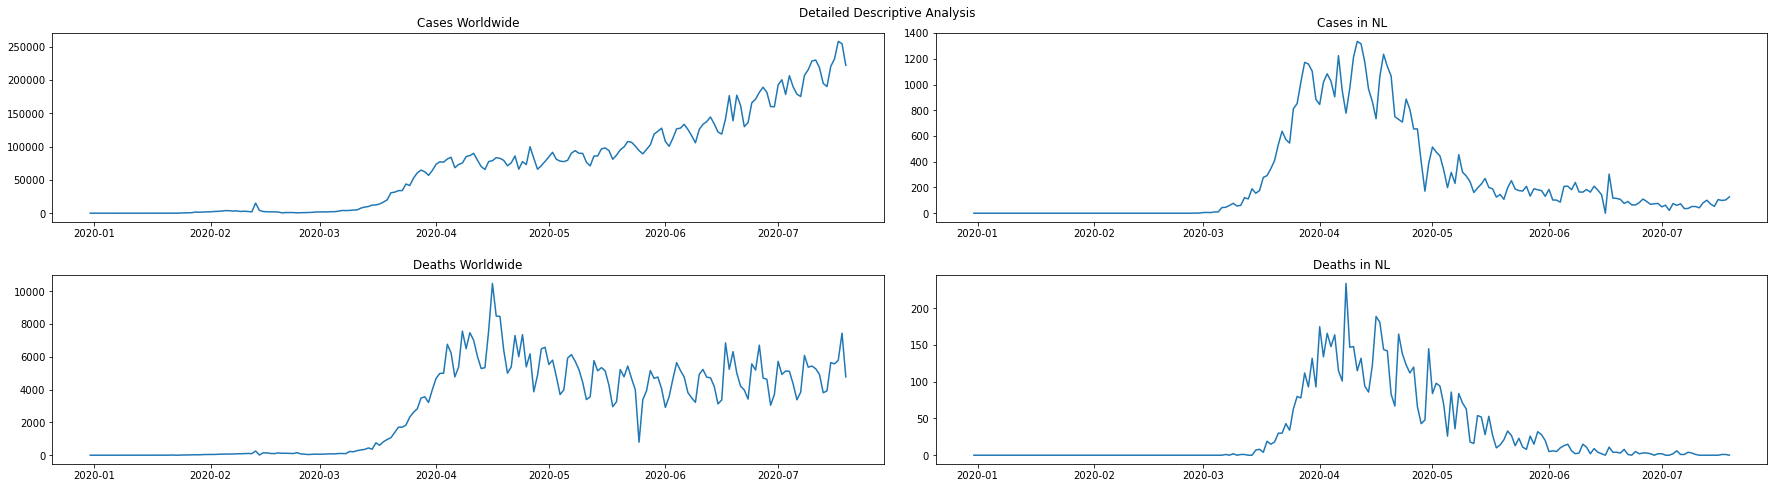

In [83]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(25,7))
fig.suptitle('Detailed Descriptive Analysis')
ax1.set_title('Cases Worldwide')
ax1.plot(cases)
ax2.set_title('Cases in NL')
ax2.plot(casesinnl)
ax3.set_title('Deaths Worldwide')
ax3.plot(deaths)
ax4.set_title('Deaths in NL')
ax4.plot(deathsinnl)
fig.tight_layout(pad=2.0)

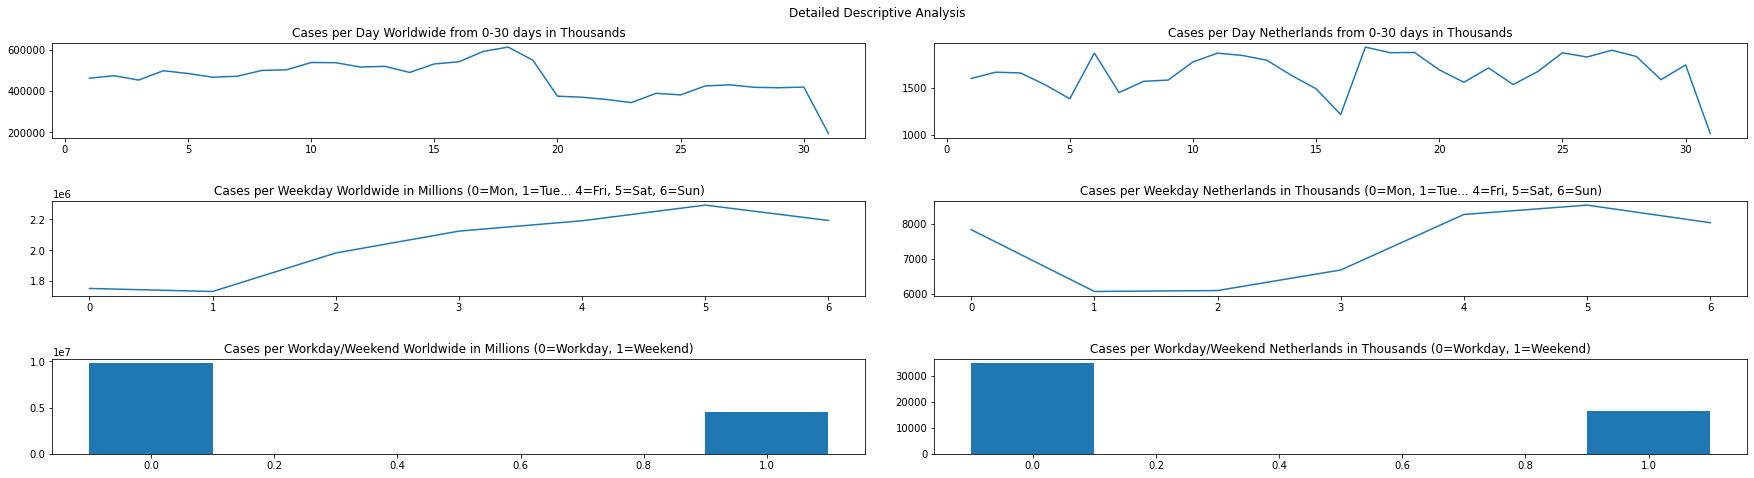

In [84]:
fig, ((ax1, ax2), (ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(25,7))
fig.suptitle('Detailed Descriptive Analysis')
ax1.set_title('Cases per Day Worldwide from 0-30 days in Thousands')
ax1.plot(df.groupby(df["date"].dt.day).sum()['cases'])
ax2.set_title('Cases per Day Netherlands from 0-30 days in Thousands')
ax2.plot(df[df['geoId']=='NL'].groupby(df["date"].dt.day).sum()['cases'])
ax3.set_title('Cases per Weekday Worldwide in Millions (0=Mon, 1=Tue... 4=Fri, 5=Sat, 6=Sun)')
ax3.plot(df.groupby(df["dayofweek"]).sum()['cases'])
ax4.set_title('Cases per Weekday Netherlands in Thousands (0=Mon, 1=Tue... 4=Fri, 5=Sat, 6=Sun)')
ax4.plot(df[df['geoId']=='NL'].groupby(df["dayofweek"]).sum()['cases'])
ax5.set_title('Cases per Workday/Weekend Worldwide in Millions (0=Workday, 1=Weekend)')
ax5.bar(weekends.index, weekends.values,width=0.2)
ax6.set_title('Cases per Workday/Weekend Netherlands in Thousands (0=Workday, 1=Weekend)')
ax6.bar(weekendsNL.index,weekendsNL.values, width=0.2)
fig.tight_layout(pad=3.0)

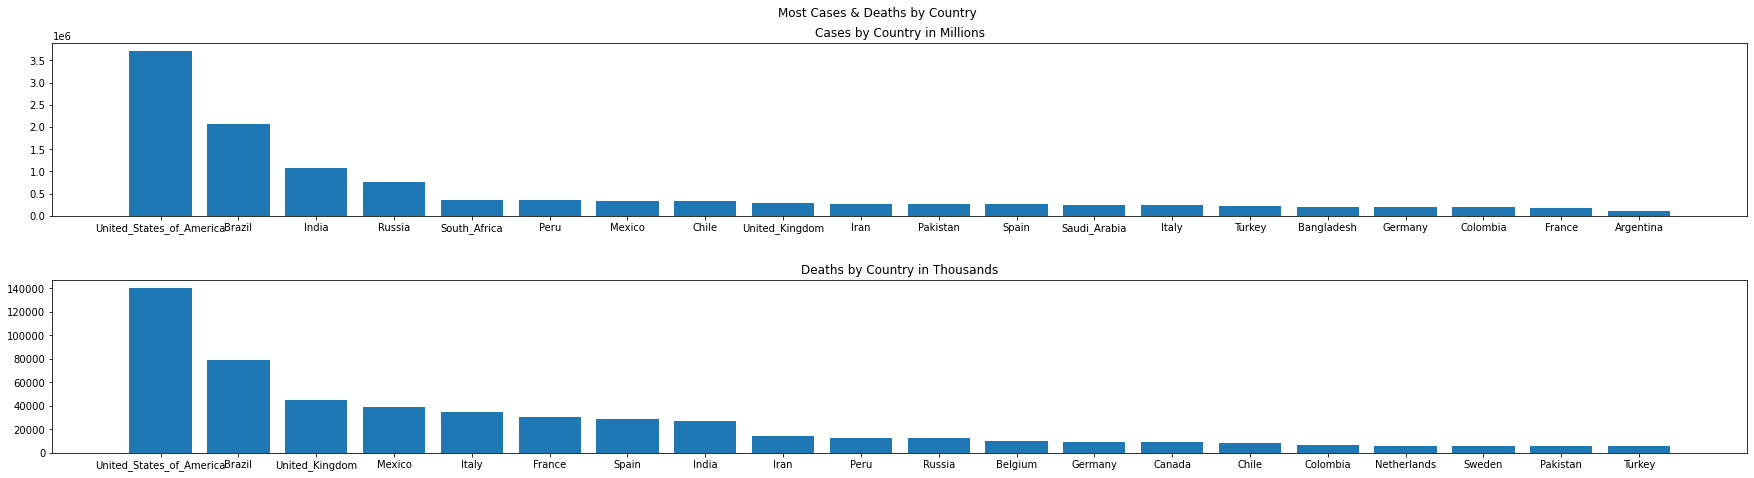

In [85]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(25,7))
fig.suptitle('Most Cases & Deaths by Country')
ax1.set_title('Cases by Country in Millions')
ax1.bar(casesbycountries.index,casesbycountries.values)
ax2.set_title('Deaths by Country in Thousands')
ax2.bar(deathsbycountries.index,deathsbycountries.values)
fig.tight_layout(pad=3.0)

### Train/Test Dataset

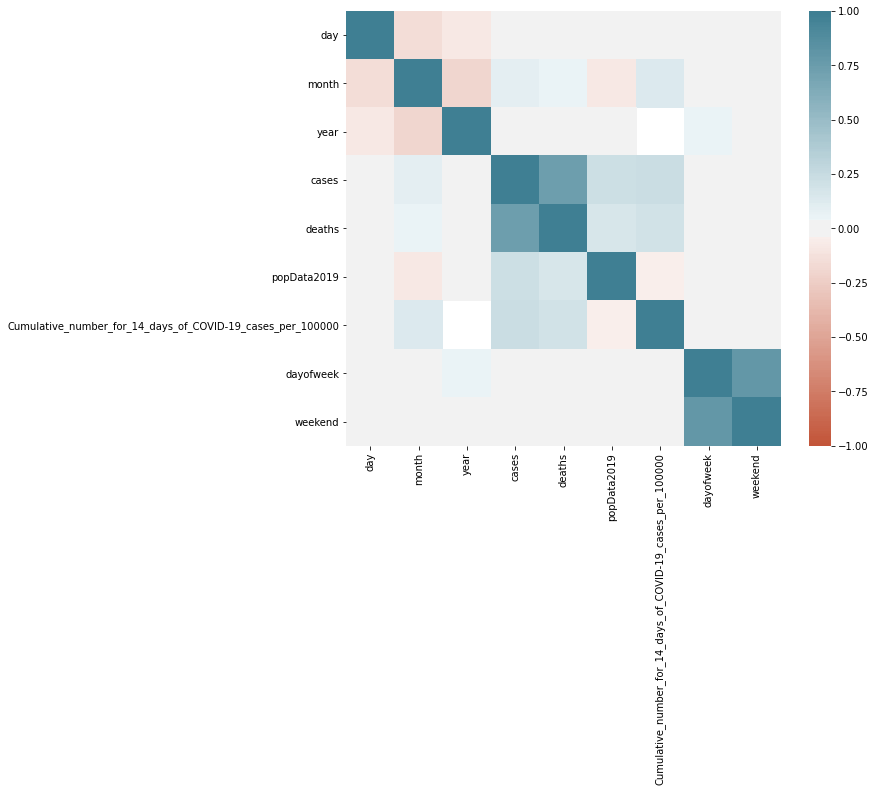

In [86]:
fig = plt.subplots(figsize=(10,8))
corr = df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1,center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)


In [10]:
import pandas as pd
import datetime
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import numpy
from sklearn import linear_model
import statsmodels.api as sm 


#### Polynomial Linear Regression


In [11]:
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
df=pd.read_csv(url)
df['dateRep'] = pd.to_datetime(df['dateRep'],dayfirst=True)
df.rename(columns={'dateRep':'date'},inplace=True)
df.head()

,date,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-20,20,7,2020,174,17,Afghanistan,AF,AFG,38041757.0,Asia,6.634814
1,2020-07-19,19,7,2020,12,17,Afghanistan,AF,AFG,38041757.0,Asia,6.910827
2,2020-07-18,18,7,2020,219,32,Afghanistan,AF,AFG,38041757.0,Asia,7.794067
3,2020-07-17,17,7,2020,76,21,Afghanistan,AF,AFG,38041757.0,Asia,8.012248
4,2020-07-16,16,7,2020,254,49,Afghanistan,AF,AFG,38041757.0,Asia,8.301404


Variance score R2: 0.95
Adjusted R2: 0.95
Residual sum of squares (SSE): 7425.54


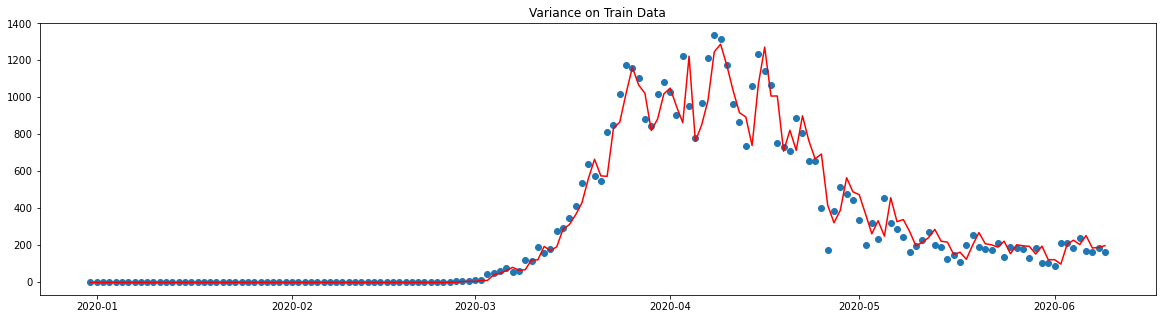

In [72]:
df1 = df.copy()
df1 = df1[df1['date']<= '2020-07-20']
data=df1[df1['geoId']=='NL']
data=data[::-1]
data = data.reset_index(drop=True)
df2 = pd.DataFrame(data.cases,)


n_samples = 3
n_vars = 1
n_output = 1
records, column_names = list(),list()

for i in range(n_samples,0,-1):
    records.append(df2.shift(i))
    column_names += [('var%d(t-%d)' % (j+1,i)) for j in range(n_vars)]
agg=pd.concat(records,axis=1)
agg.columns = column_names
agg['output'] = df2['cases']

ratio = 0.8
n_train = int(agg.shape[0]*ratio)
x=agg.iloc[n_samples:,0:n_samples]
y=agg.iloc[n_samples:,-1]

xtrain = x[:n_train]
ytrain = y[:n_train]
xtest = x[n_train:]
ytest = y[n_train:]

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 2) 
x_poly=poly.fit_transform(xtrain)
#n_poly=len(x_poly)

poly.fit(x_poly,ytrain)
lin=linear_model.LinearRegression()
lin.fit(x_poly,ytrain)

yhattrain = lin.predict(poly.fit_transform(xtrain))
plt.figure(figsize=(20,5))
plt.scatter(data['date'][:n_train],ytrain)
plt.plot(data['date'][:n_train],yhattrain,color = 'red')
plt.title('Variance on Train Data')
# Explained variance score: 1 is perfect prediction
r2 = lin.score(poly.fit_transform(xtrain), ytrain)
n=xtrain.shape[0]
p=xtrain.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print('Variance score R2: %.2f' % r2)
print('Adjusted R2: %.2f' % adjusted_r2) 
print("Residual sum of squares (SSE): %.2f" % np.mean((ytrain-yhattrain) ** 2))

![](Ar2.png) #R-squared is the coefficient of determination, is the proportion of the variance in the dependent variable that is predictable from the independent variable(s)

#Adjusted R2 adjusts the statistic based on the number of independent variables in the model.

#SSE A residual sum of squares (RSS) is a statistical technique used to measure the amount of variance in a data set that is not explained by a regression model

Variance score R2: -0.31
Adjusted R2: -0.43
Residual sum of squares: 3789.93


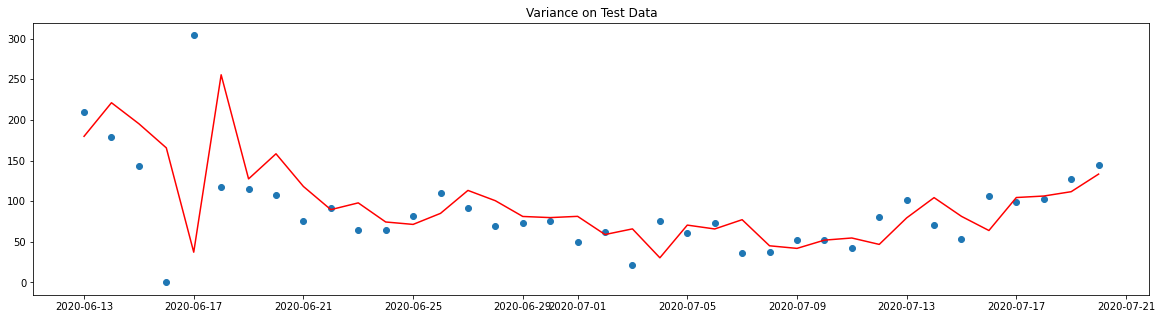

In [73]:
yhattest = lin.predict(poly.fit_transform(xtest))
plt.figure(figsize=(20,5))
plt.scatter(data['date'][n_train+n_samples:],ytest)
plt.plot(data['date'][n_train+n_samples:],yhattest,color = 'red')
plt.title('Variance on Test Data')
# Explained variance score: 1 is perfect prediction
r2=lin.score(poly.fit_transform(xtest), ytest)
n=xtest.shape[0]
p=xtest.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print('Variance score R2: %.2f' % r2)

print('Adjusted R2: %.2f' % adjusted_r2)
print("Residual sum of squares: %.2f" % np.mean((ytest-yhattest) ** 2))


In [74]:
yhat = lin.predict(poly.fit_transform(x))
agg = agg.iloc[n_samples:,:]
agg['yhat'] = yhat
agg['date'] = data['date']
agg.tail()

,var1(t-3),var1(t-2),var1(t-1),output,yhat,date
198,101.0,71.0,53.0,106,63.890808,2020-07-16
199,71.0,53.0,106.0,99,104.476772,2020-07-17
200,53.0,106.0,99.0,103,106.316850,2020-07-18
201,106.0,99.0,103.0,127,111.656183,2020-07-19
202,99.0,103.0,127.0,144,133.301319,2020-07-20
